In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from bs4 import BeautifulSoup

url = "https://www.ligue1.fr/classement?seasonId=2019-2020&matchDay=27"
j=input('Quelle journee ? (0 pour derniere journee) : ')
if j:url = "https://www.ligue1.fr/classement?seasonId=2019-2020&matchDay="+str(j)

result = requests.get(url, verify=False)
src = result.content

soup = BeautifulSoup(src, 'lxml')
#print(soup.prettify())

Quelle journee ? (0 pour derniere journee) : 28


In [2]:
title = soup.find(class_ = 'title')
#print(title.div)
week = title.div.contents[2].strip()
print(week)

Journée 28


In [3]:
page = soup.find(class_='container page-section')
#print(page.prettify())

In [4]:
table = page.find(class_='classement-table')
#print(table.prettify())

In [5]:
head = table.find(class_='classement-table-head')
#print(head.prettify())

span_head = head.find_all('span')
#for s in span_head:
#    print(s.contents[0], end='\t')

del(span_head[3])
del(span_head[4])
    
#print(span_head)

In [6]:
body = table.find(class_='classement-table-body')
#print(body.prettify())

In [7]:
li_tags = body.find_all('li')
#print(len(li_tags), li_tags[1].prettify())

In [8]:
def create_row(position):
    col = li_tags[position].find_all('div')
    row = {}
    for k, c in enumerate(col):
        if k == 10 : break
        content = c.contents[0]
        if k == 1 : content = c.contents[3].find('span').contents[0]
        #print(k, span_head[k].contents[0], content)
        row[span_head[k].contents[0]] = content
    #print(row)
    return row
rows = []    
for n in range(20):
    rows.append(create_row(n))

In [9]:
import pandas as pd
print(week)
df  = pd.DataFrame.from_dict(rows)
df

Journée 28


,POSITION,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.
0,1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,+51
1,2,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,+12
2,3,STADE RENNAIS FC,50,28,15,5,8,38,24,+14
3,4,LOSC LILLE,49,28,15,4,9,35,27,+8
4,5,STADE DE REIMS,41,28,10,11,7,26,21,+5
5,6,OGC NICE,41,28,11,8,9,41,38,+3
6,7,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,+15
7,8,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,+1
8,9,AS MONACO,40,28,11,7,10,44,44,0
9,10,ANGERS SCO,39,28,11,6,11,28,33,-5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   POSITION     20 non-null     object
 1   CLUB         20 non-null     object
 2   POINTS       20 non-null     object
 3   JOUÉS        20 non-null     object
 4   GAGNÉS       20 non-null     object
 5   NULS         20 non-null     object
 6   PERDUS       20 non-null     object
 7   BUTS POUR    20 non-null     object
 8   BUTS CONTRE  20 non-null     object
 9   DIFF.        20 non-null     object
dtypes: object(10)
memory usage: 864.0+ bytes


In [11]:
#convert columns str to int
for i in range(2,10):
    #print(df.iloc[:,i])
    df.iloc[:,i]=df.iloc[:,i].astype('int') 
#type(df.iloc[0,1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   POSITION     20 non-null     object
 1   CLUB         20 non-null     object
 2   POINTS       20 non-null     int32 
 3   JOUÉS        20 non-null     int32 
 4   GAGNÉS       20 non-null     int32 
 5   NULS         20 non-null     int32 
 6   PERDUS       20 non-null     int32 
 7   BUTS POUR    20 non-null     int32 
 8   BUTS CONTRE  20 non-null     int32 
 9   DIFF.        20 non-null     int32 
dtypes: int32(8), object(2)
memory usage: 864.0+ bytes


In [12]:
df.set_index('POSITION', drop=True, inplace=True)
df

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.
POSITION,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51
2,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,12
3,STADE RENNAIS FC,50,28,15,5,8,38,24,14
4,LOSC LILLE,49,28,15,4,9,35,27,8
5,STADE DE REIMS,41,28,10,11,7,26,21,5
6,OGC NICE,41,28,11,8,9,41,38,3
7,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,15
8,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,1
9,AS MONACO,40,28,11,7,10,44,44,0


In [13]:
df.to_csv('ligue1_2020_27.csv', sep = ',')

In [14]:
# add column with computed values
df['Pts/J']=df.iloc[:,1]/df.iloc[:,2]
df['Bp/J']=df.iloc[:,6]/df.iloc[:,2]
df['Bc/J']=df.iloc[:,7]/df.iloc[:,2]
df

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
POSITION,,,,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
2,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,12,2.000000,1.464286,1.035714
3,STADE RENNAIS FC,50,28,15,5,8,38,24,14,1.785714,1.357143,0.857143
4,LOSC LILLE,49,28,15,4,9,35,27,8,1.750000,1.250000,0.964286
5,STADE DE REIMS,41,28,10,11,7,26,21,5,1.464286,0.928571,0.750000
6,OGC NICE,41,28,11,8,9,41,38,3,1.464286,1.464286,1.357143
7,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,15,1.428571,1.500000,0.964286
8,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,1,1.428571,1.250000,1.214286
9,AS MONACO,40,28,11,7,10,44,44,0,1.428571,1.571429,1.571429


In [15]:
df.to_csv('ligue1_2020_extended.txt', sep = ',')

In [16]:
df.describe()

,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.350000,27.900000,10.450000,7.000000,10.450000,35.200000,35.200000,0.000000,1.376653,1.264220,1.260847
std,11.811123,0.307794,4.285533,2.595543,3.859029,11.260551,9.361736,17.238268,0.434055,0.420272,0.331776
min,13.000000,27.000000,3.000000,2.000000,3.000000,22.000000,21.000000,-36.000000,0.464286,0.785714,0.750000
25%,33.000000,28.000000,8.000000,5.000000,9.000000,28.000000,28.500000,-8.500000,1.178571,1.000000,1.017857
50%,38.500000,28.000000,11.000000,7.000000,10.000000,33.000000,34.000000,0.000000,1.400132,1.199735,1.214286
75%,41.000000,28.000000,11.000000,9.250000,12.250000,40.250000,39.500000,6.500000,1.464286,1.437500,1.410714
max,68.000000,28.000000,22.000000,11.000000,21.000000,75.000000,58.000000,51.000000,2.518519,2.777778,2.071429


In [17]:
def moyVar(X):
    n = len(X)
    if n==0:
        return None
    else:
        s1, s2 = 0, 0
        for x in X:
            s1 = s1 + x
            s2 = s2 + x*x
        m = s1/n
        return m,s2/n - m**2

def moyVarP(X, N):
    p1, p2 = len(X), len(N)
    if p1==0 or p2 != p1:
        return None
    else:
        s1, s2, n = 0, 0, 0
        for k in range(1,p1):
            n = n + N[k]
            z = N[k]*X[k]
            s1 = s1 + z
            s2 = s2 + z*X[k]
        m = s1/n
        return m,s2/n - m**2

In [18]:
moyenne,variance=moyVar(df.POINTS)
df2 = df[df.POINTS>moyenne]
df2

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
POSITION,,,,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
2,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,12,2.000000,1.464286,1.035714
3,STADE RENNAIS FC,50,28,15,5,8,38,24,14,1.785714,1.357143,0.857143
4,LOSC LILLE,49,28,15,4,9,35,27,8,1.750000,1.250000,0.964286
5,STADE DE REIMS,41,28,10,11,7,26,21,5,1.464286,0.928571,0.750000
6,OGC NICE,41,28,11,8,9,41,38,3,1.464286,1.464286,1.357143
7,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,15,1.428571,1.500000,0.964286
8,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,1,1.428571,1.250000,1.214286
9,AS MONACO,40,28,11,7,10,44,44,0,1.428571,1.571429,1.571429


In [19]:
import numpy as np
import matplotlib.pyplot as plt
l = len(df)
x = np.arange(l)
y = df.POINTS
plt.plot(x,y)
plt.plot(x,np.ones(l)*moyenne)
plt.plot(x,np.ones(l)*variance)
plt.show()

<Figure size 640x480 with 1 Axes>

In [33]:

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def draw_stackedbar():
    N = 20
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, df['GAGNÉS'], width)
    p2 = plt.bar(ind, df['NULS'], width, bottom=df['GAGNÉS'])
    p3 = plt.bar(ind, df['PERDUS'], width, bottom=df['GAGNÉS']+df['NULS'])
    plt.legend((p1[0], p2[0], p3[0]), ('Gagnés', 'Nuls', 'Perdus'))
    plt.show()

def draw_groupedbar(df, cols):
    N = 20
    x = np.arange(N)  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, df[cols[0]], width, label=cols[0])
    rects2 = ax.bar(x , df[cols[1]], width, label=cols[1])
    rects3 = ax.bar(x + width, df[cols[2]], width, label=cols[2])
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Matchs')
    ax.set_title('Scores')
    ax.set_xticks(x)
    #ax.set_xticklabels(labels)
    ax.legend()
    # label each bar at top
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    autolabel(ax, rects3)
    fig.tight_layout()
    plt.show()
    
def scatter(df,cols,factor=10):
    x = df[cols[0]]
    y = df[cols[1]]
    s, c = np.random.rand(2, 20)
    s = x*factor
    c = x+y
    fig, ax = plt.subplots()
    ax.scatter(x, y, s, c)
    ax.set_ylabel(cols[1])
    ax.set_xlabel(cols[0])
    plt.show()


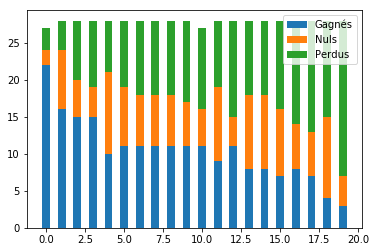

In [34]:
draw_stackedbar()

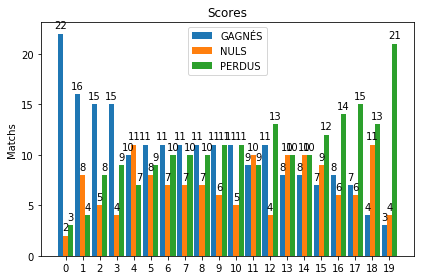

In [22]:
cols = ('GAGNÉS','NULS','PERDUS')
draw_groupedbar(df, cols)

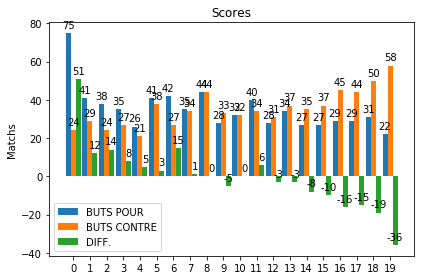

In [23]:
cols = ('BUTS POUR', 'BUTS CONTRE', 'DIFF.')
draw_groupedbar(df, cols)

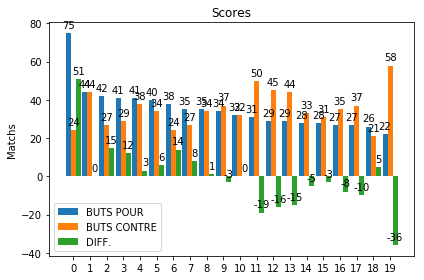

In [24]:
result = df.sort_values(by=['BUTS POUR'], ascending=[0])
draw_groupedbar(result, cols)

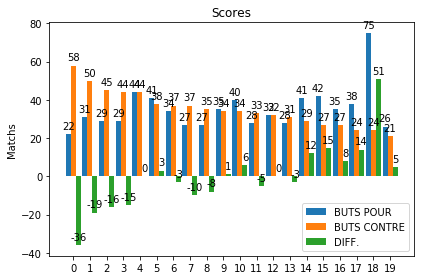

In [25]:
result = df.sort_values(by=['BUTS CONTRE'], ascending=[0])
draw_groupedbar(result, cols)

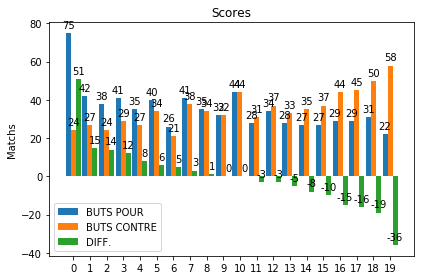

In [26]:
result = df.sort_values(by=['DIFF.'], ascending=[0])
draw_groupedbar(result, cols)

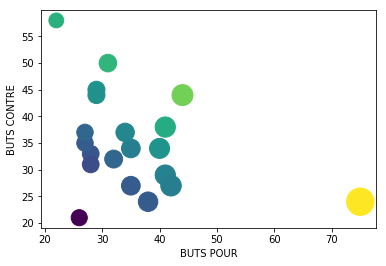

In [27]:
cols =('BUTS POUR', 'BUTS CONTRE')
scatter(df, cols)

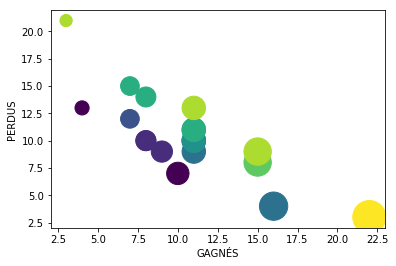

In [28]:
cols =('GAGNÉS', 'PERDUS')
scatter(df, cols, 50)

In [31]:
df.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='POSITION')

In [32]:
df

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
POSITION,,,,,,,,,,,,
1,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
2,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,12,2.000000,1.464286,1.035714
3,STADE RENNAIS FC,50,28,15,5,8,38,24,14,1.785714,1.357143,0.857143
4,LOSC LILLE,49,28,15,4,9,35,27,8,1.750000,1.250000,0.964286
5,STADE DE REIMS,41,28,10,11,7,26,21,5,1.464286,0.928571,0.750000
6,OGC NICE,41,28,11,8,9,41,38,3,1.464286,1.464286,1.357143
7,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,15,1.428571,1.500000,0.964286
8,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,1,1.428571,1.250000,1.214286
9,AS MONACO,40,28,11,7,10,44,44,0,1.428571,1.571429,1.571429
